## Data Analysis using BulkLMM - BXD Longevity Study

In [1]:
using CSV, DelimitedFiles, DataFrames, Missings, XLSX
using LinearAlgebra, Statistics, Optim
using Random, Distributions, LoopVectorization
# using GeneNetworkAPI, Downloads
using BenchmarkTools

In [2]:
using Plots

In [3]:
local_path = "../../BulkLMM.jl/src";

## Load processed_data:

### By individuals:

In [4]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [5]:
BXD_pheno_ind_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_pheno_summary.csv", DataFrame);

By individuals, there are 248 individual samples for 32445 livear proteome.

In [6]:
println(size(BXD_pheno_ind_summary_df)) 
BXD_pheno_ind_summary_df[1:10, 1:10]

(248, 32448)


Row,Sample,Strain,Strain_num,P42209_DESGLNRK_2,P42209_GLRPLDVAFLR_3,Q99M02_VGDPVYR_2,Q99M02_VWIYPIK_2,Q99M02_LCDPSVK_2,Q99M02_CVLTTVDPDTGIIDR_2,Q99M02_LVQFDTSMK_2
,String7,String7,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,H1009,BXD9,9,11.349,11.534,17.587,17.517,17.309,16.574,16.323
2,H0370,BXD9,9,11.249,12.735,17.427,17.325,17.252,16.685,16.021
3,H2577,BXD9,9,12.415,10.487,17.89,17.488,17.594,16.731,16.208
4,H0365,BXD9,9,11.374,10.674,17.714,17.401,17.381,16.621,16.337
5,H1333,BXD13,13,11.687,11.524,17.362,17.367,17.071,16.465,15.97
6,H2259,BXD24,24,11.837,11.715,17.57,17.792,17.505,16.894,16.277
7,H1792,BXD24,24,11.563,11.434,17.789,17.847,17.416,17.042,16.292
8,H1791,BXD24,24,12.5,12.273,17.944,17.833,17.63,16.862,16.3
9,H1541,BXD24,24,11.815,11.564,17.794,17.759,17.456,16.878,16.377


In [7]:
BXD_geno_ind_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_geno_summary.csv", DataFrame);

By individuals, there are 248 individual samples for 7321 markers.

In [8]:
println(size(BXD_geno_ind_summary_df)) 
BXD_geno_ind_summary_df[1:10, 1:10]

(248, 7324)


Row,Sample,Strain,Strain_num,rs31443144,rs6269442,rs32285189,rs258367496,rs32430919,rs36251697,rs30658298
,String7,String7,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,H1009,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,H0370,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H2577,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,H0365,BXD9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,H1333,BXD13,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,H2259,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,H1792,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,H1791,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,H1541,BXD24,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### By strains:

In [9]:
pwd()

"/home/zyu20/git/BulkLMM_Analyses/BXDLongevity"

In [10]:
BXD_pheno_strains_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_pheno_strain_means_summary.csv", DataFrame);

By strains, there are 50 BXD strains for 32445 liver proteome.

In [11]:
println(size(BXD_pheno_strains_summary_df)) 
BXD_pheno_strains_summary_df[1:10, 1:10]

(50, 32447)


Row,Strain,Number of Samples,P42209_DESGLNRK_2,P42209_GLRPLDVAFLR_3,Q99M02_VGDPVYR_2,Q99M02_VWIYPIK_2,Q99M02_LCDPSVK_2,Q99M02_CVLTTVDPDTGIIDR_2,Q99M02_LVQFDTSMK_2,Q99M02_QLQQVGTVSK_2
,String7,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,BXD9,4,11.5968,11.3575,17.6545,17.4327,17.384,16.6528,16.2222,16.3227
2,BXD13,1,11.687,11.524,17.362,17.367,17.071,16.465,15.97,15.98
3,BXD24,5,12.0778,11.7458,17.7926,17.8152,17.5168,16.9196,16.3012,16.4304
4,BXD27,3,11.717,11.149,17.336,17.3143,17.165,16.5283,15.9407,16.002
5,BXD29,11,11.735,11.3496,17.4583,17.3877,17.2431,16.4945,16.0869,16.1075
6,BXD32,8,11.6266,11.554,17.8254,17.7716,17.4639,16.9029,16.434,16.425
7,BXD34,13,11.7491,11.9135,17.6108,17.5974,17.2988,16.7761,16.3147,16.2926
8,BXD39,5,11.9158,11.719,17.395,17.385,17.157,16.5226,16.179,16.0594
9,BXD40,8,11.8651,11.6817,17.5986,17.6386,17.3861,16.6824,16.2855,16.2523


In [12]:
BXD_geno_strains_summary_df = CSV.read("../../../shareddata/BXDLongevity/data/GN886_geno_strains_summary.csv", DataFrame);

By strains, there are 50 BXD strains for 7321 markers.

In [13]:
println(size(BXD_geno_strains_summary_df)) 
BXD_geno_strains_summary_df[1:10, 1:10]

(50, 7322)


Row,Strain,rs31443144,rs6269442,rs32285189,rs258367496,rs32430919,rs36251697,rs30658298,rs51852623,rs31879829
,String7,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,BXD9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BXD13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BXD24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BXD27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,BXD29,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,BXD32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,BXD34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,BXD39,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,BXD40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Load functions:

In [14]:
include(joinpath(local_path, "kinship.jl"));
include(joinpath(local_path, "util.jl"));
include(joinpath(local_path, "wls.jl"));
include(joinpath(local_path, "lmm.jl"));
include(joinpath(local_path, "gridbrent.jl"));
include(joinpath(local_path, "transform_helpers.jl"));
include(joinpath(local_path, "scan.jl"));
include(joinpath(local_path, "bulkscan_helpers.jl"));
include(joinpath(local_path, "bulkscan.jl"));
include(joinpath(local_path, "readData.jl"));
include(joinpath(local_path, "../plot_utils/visuals_utils.jl"));
include(joinpath(local_path, "analysis_helpers/single_trait_analysis.jl"));

## Objectives

- gemma one trait, ind and strains

- scan_alt one trait, ind and strains

- scan_null one trait, ind and strains

- bulkscan_grid (null), all traits, ...

- data structure for all traits results...

- Heatmap grids_taken, compare on strain means and individuals

- Histogram of heritabilities (null) for all traits (both strain means and individual level data)

- Loglikelihood by h2_grid plot, strain means v.s. individuals

- Report fixed effects:

- Adjusting difference in the number of samples across strains

- Histogram of heritabilities (null) for all traits (both strain means and individual level data)

## Run BulkLMM.jl:

### Calculate kinship:

First, calculate the kinship matrix of relatedness among the strains (50-by-50):

In [15]:
geno_strains = Matrix{Float64}(BXD_geno_strains_summary_df[:, 2:end]);

In [16]:
kinship_strains = calcKinship(geno_strains);

Then, construct the kinship matrix of relatedness among the individuals based on which strain they are from:

In [17]:
function calcRepeats(x::Array{<:Any, 1})
    
    counting_dict = Dict{Any, Int64}();
    
    for i in 1:length(x)
        curr_key = x[i];
        if haskey(counting_dict, curr_key) # if current key already exists
            counting_dict[curr_key] += 1;
        else # if current key does not present, add it as a new key
            counting_dict[curr_key] = 1;
        end
    end
    
    return counting_dict
    
end

calcRepeats (generic function with 1 method)

In [18]:
function calcIndKinship_from_StrainKinship(kinship_strains::Array{Float64, 2}, 
                                           strain_info_about_samples::Array{Int64, 1})
    
    counting_dict = calcRepeats(strain_info_about_samples);
    reps_each_strain = map(x -> counting_dict[x], unique(strain_info_about_samples));
    
    # Initialize the placeholder:
    kinship_ind_from_strains = ones(sum(reps_each_strain), sum(reps_each_strain));

    # process the first BXD strain...
    reps_strain_1 = reps_each_strain[1];
    k_11 = kinship_strains[1, 1];
    # block_11 = ones(reps_strain_1, reps_strain_1);

    row_id = 0;
    col_id = 0;

    @views kinship_ind_from_strains[(row_id+1):(row_id+reps_strain_1), 
                             (row_id+1):(row_id+reps_strain_1)] .*= k_11;

    for j in 2:length(reps_each_strain)
        reps_strain_j = reps_each_strain[j];
        k_1j = kinship_strains[1, j];
        # block_1j = ones(reps_strain_1, reps_strain_j);

        col_id += reps_each_strain[j-1];
        @views kinship_ind_from_strains[(row_id+1):(row_id+reps_strain_1), 
                                 (col_id+1):(col_id+reps_strain_j)] .*= k_1j;

        # process the off-diagonal block conveniently...
        # block_j1 = ones(reps_strain_j, reps_strain_1);
        kinship_ind_from_strains[(col_id+1):(col_id+reps_strain_j),
                                 (row_id+1):(row_id+reps_strain_1)] .*= k_1j;

    end

    # process for the second BXD strain and all after...
    # for i in 2:length(reps_each_strain)
    for i in 2:length(reps_each_strain)

        reps_strain_i = reps_each_strain[i];
        k_ii = kinship_strains[i, i];
        # block_ii = ones(reps_strain_i, reps_strain_i);

        row_id += reps_each_strain[i-1];
        @views kinship_ind_from_strains[(row_id+1):(row_id+reps_strain_i), 
                                 (row_id+1):(row_id+reps_strain_i)] .*= k_ii;

        col_id = row_id+reps_strain_i;

        for j in (i+1):length(reps_each_strain)

            reps_strain_j = reps_each_strain[j];
            k_ij = kinship_strains[i, j];
            # block_ij = ones(reps_strain_i, reps_strain_j);

            @views kinship_ind_from_strains[(row_id+1):(row_id+reps_strain_i), 
                                     (col_id+1):(col_id+reps_strain_j)] .*= k_ij;

            # process the off-diagonal block conveniently...
            # block_ji = ones(reps_strain_j, reps_strain_i);
            @views kinship_ind_from_strains[(col_id+1):(col_id+reps_strain_j),
                                     (row_id+1):(row_id+reps_strain_i)] .*= k_ij;

            col_id += reps_each_strain[j];
        end
    
    end
    
    return kinship_ind_from_strains
end

calcIndKinship_from_StrainKinship (generic function with 1 method)

In [20]:
BXD_geno_ind_summary_df.Strain_num = Vector{Int64}(BXD_geno_ind_summary_df.Strain_num);

In [21]:
BXD_geno_ind_summary_df.Strain_num

248-element Vector{Int64}:
   9
   9
   9
   9
  13
  24
  24
  24
  24
  24
  27
  27
  27
   ⋮
 102
 102
 102
 102
 102
 102
 102
 102
 102
 102
 102
 102

In [22]:
s = "BXD" .* string.(collect(1:10))

10-element Vector{String}:
 "BXD1"
 "BXD2"
 "BXD3"
 "BXD4"
 "BXD5"
 "BXD6"
 "BXD7"
 "BXD8"
 "BXD9"
 "BXD10"

In [23]:
repeat(s[1:2], inner = 3)

6-element Vector{String}:
 "BXD1"
 "BXD1"
 "BXD1"
 "BXD2"
 "BXD2"
 "BXD2"

In [24]:
df1 = calcRepeats(BXD_geno_ind_summary_df.Strain_num)

Dict{Any, Int64} with 50 entries:
  56 => 1
  55 => 1
  60 => 3
  32 => 8
  67 => 2
  45 => 5
  73 => 7
  64 => 3
  90 => 6
  13 => 1
  63 => 12
  86 => 4
  91 => 2
  62 => 5
  75 => 2
  43 => 4
  69 => 5
  68 => 2
  98 => 5
  39 => 5
  84 => 2
  77 => 6
  95 => 5
  66 => 5
  34 => 13
  ⋮  => ⋮

In [25]:
BXD_geno_ind_summary_df.Strain = BXD_geno_ind_summary_df.Strain |> Array{String}

248-element Vector{String}:
 "BXD9"
 "BXD9"
 "BXD9"
 "BXD9"
 "BXD13"
 "BXD24"
 "BXD24"
 "BXD24"
 "BXD24"
 "BXD24"
 "BXD27"
 "BXD27"
 "BXD27"
 ⋮
 "BXD102"
 "BXD102"
 "BXD102"
 "BXD102"
 "BXD102"
 "BXD102"
 "BXD102"
 "BXD102"
 "BXD102"
 "BXD102"
 "BXD102"
 "BXD102"

In [26]:
typeof(BXD_geno_ind_summary_df.Strain)

Vector{String} (alias for Array{String, 1})

In [27]:
df_any = calcRepeats(BXD_geno_ind_summary_df.Strain)

Dict{Any, Int64} with 50 entries:
  "BXD53"  => 3
  "BXD32"  => 8
  "BXD70"  => 7
  "BXD79"  => 5
  "BXD48"  => 6
  "BXD60"  => 3
  "BXD13"  => 1
  "BXD69"  => 5
  "BXD90"  => 6
  "BXD49"  => 2
  "BXD51"  => 5
  "BXD84"  => 2
  "BXD101" => 5
  "BXD86"  => 4
  "BXD40"  => 8
  "BXD50"  => 3
  "BXD65"  => 13
  "BXD88"  => 1
  "BXD95"  => 5
  "BXD27"  => 3
  "BXD61"  => 8
  "BXD29"  => 11
  "BXD74"  => 1
  "BXD100" => 8
  "BXD91"  => 2
  ⋮        => ⋮

In [28]:
function createRanges(values::Array{Int64, 1})
    
    m = length(values); # number of strains
    
    list_ranges = Array{UnitRange{Int64}, 1}(undef, m)
    startpt = 1
    
    for i in 1:length(values)
        endpt = startpt+values[i]-1;
        list_ranges[i] = startpt:endpt
        startpt = endpt+1
    end
    
    return list_ranges
    
end

createRanges (generic function with 1 method)

In [29]:
typeof(1:3)

UnitRange{Int64}

In [30]:
example = [3, 2, 4];

In [31]:
test_ranges = createRanges(example)

3-element Vector{UnitRange{Int64}}:
 1:3
 4:5
 6:9

In [32]:
!(1 in 1:3)

false

In [33]:
function mapIds(id::Int64, ranges::Array{UnitRange{Int64}, 1})
    
    curr_group = 1;
    
    while !(id in ranges[curr_group])
        curr_group = curr_group+1;
    end
    
    return curr_group
    
end

mapIds (generic function with 1 method)

In [34]:
mapIds(7, test_ranges)

3

In [35]:
function mapValues(idx::Int64, idy::Int64, ranges::Array{UnitRange{Int64}, 1}, K::Array{Float64, 2})
    
    f_idx = mapIds(idx, ranges);
    f_idy = mapIds(idy, ranges);
    
    return K[f_idx, f_idy];
    
end

mapValues (generic function with 1 method)

In [36]:
function calcKinship2(kinship_strains::Array{Float64, 2}, 
                      strain_info_about_samples::Array{<:Any, 1})

    counting_dict = calcRepeats(strain_info_about_samples);
    reps_each_strain = map(x -> counting_dict[x], unique(strain_info_about_samples));
    ranges = createRanges(reps_each_strain);
    
    n = sum(reps_each_strain); # total number of individual samples
    
    kinship_ind = ones(n, n);
    
    for i in 1:n
        for j in 1:n
            kinship_ind[i, j] = mapValues(i, j, ranges, kinship_strains);
        end
    end
    
    return kinship_ind;    

end

calcKinship2 (generic function with 1 method)

In [37]:
example_K = [1 0.5 0.6; 
             0.5 1 0.7;
             0.6 0.7 1]

3×3 Matrix{Float64}:
 1.0  0.5  0.6
 0.5  1.0  0.7
 0.6  0.7  1.0

In [38]:
example_strain_each_sample = [1, 1, 1, 2, 2, 3, 3, 3, 3];

In [39]:
@time example_test_K2 = calcKinship2(example_K, example_strain_each_sample)

  0.066833 seconds (89.73 k allocations: 4.821 MiB, 99.95% compilation time)


9×9 Matrix{Float64}:
 1.0  1.0  1.0  0.5  0.5  0.6  0.6  0.6  0.6
 1.0  1.0  1.0  0.5  0.5  0.6  0.6  0.6  0.6
 1.0  1.0  1.0  0.5  0.5  0.6  0.6  0.6  0.6
 0.5  0.5  0.5  1.0  1.0  0.7  0.7  0.7  0.7
 0.5  0.5  0.5  1.0  1.0  0.7  0.7  0.7  0.7
 0.6  0.6  0.6  0.7  0.7  1.0  1.0  1.0  1.0
 0.6  0.6  0.6  0.7  0.7  1.0  1.0  1.0  1.0
 0.6  0.6  0.6  0.7  0.7  1.0  1.0  1.0  1.0
 0.6  0.6  0.6  0.7  0.7  1.0  1.0  1.0  1.0

In [40]:
@time kinship2_ind = calcKinship2(kinship_strains, BXD_geno_ind_summary_df.Strain_num);

  0.003055 seconds (28 allocations: 493.797 KiB)


In [41]:
df_any["BXD34"]

13

In [42]:
@time kinship_ind_from_strains = calcIndKinship_from_StrainKinship(kinship_strains, BXD_geno_ind_summary_df.Strain_num);

  0.000251 seconds (76 allocations: 503.750 KiB)


In [43]:
kinship2_ind

248×248 Matrix{Float64}:
 1.0       1.0       1.0       1.0       …  0.549925  0.549925  0.549925
 1.0       1.0       1.0       1.0          0.549925  0.549925  0.549925
 1.0       1.0       1.0       1.0          0.549925  0.549925  0.549925
 1.0       1.0       1.0       1.0          0.549925  0.549925  0.549925
 0.554842  0.554842  0.554842  0.554842     0.531895  0.531895  0.531895
 0.583732  0.583732  0.583732  0.583732  …  0.540227  0.540227  0.540227
 0.583732  0.583732  0.583732  0.583732     0.540227  0.540227  0.540227
 0.583732  0.583732  0.583732  0.583732     0.540227  0.540227  0.540227
 0.583732  0.583732  0.583732  0.583732     0.540227  0.540227  0.540227
 0.583732  0.583732  0.583732  0.583732     0.540227  0.540227  0.540227
 0.529504  0.529504  0.529504  0.529504  …  0.557984  0.557984  0.557984
 0.529504  0.529504  0.529504  0.529504     0.557984  0.557984  0.557984
 0.529504  0.529504  0.529504  0.529504     0.557984  0.557984  0.557984
 ⋮                        

In [44]:
kinship_ind_from_strains

248×248 Matrix{Float64}:
 1.0       1.0       1.0       1.0       …  0.549925  0.549925  0.549925
 1.0       1.0       1.0       1.0          0.549925  0.549925  0.549925
 1.0       1.0       1.0       1.0          0.549925  0.549925  0.549925
 1.0       1.0       1.0       1.0          0.549925  0.549925  0.549925
 0.554842  0.554842  0.554842  0.554842     0.531895  0.531895  0.531895
 0.583732  0.583732  0.583732  0.583732  …  0.540227  0.540227  0.540227
 0.583732  0.583732  0.583732  0.583732     0.540227  0.540227  0.540227
 0.583732  0.583732  0.583732  0.583732     0.540227  0.540227  0.540227
 0.583732  0.583732  0.583732  0.583732     0.540227  0.540227  0.540227
 0.583732  0.583732  0.583732  0.583732     0.540227  0.540227  0.540227
 0.529504  0.529504  0.529504  0.529504  …  0.557984  0.557984  0.557984
 0.529504  0.529504  0.529504  0.529504     0.557984  0.557984  0.557984
 0.529504  0.529504  0.529504  0.529504     0.557984  0.557984  0.557984
 ⋮                        

In [45]:
sum(abs.(kinship2_ind .- kinship_ind_from_strains))

0.0

Compare the runtime with directly calculating the kinship matrix from individual genotype data:

In [46]:
round.(kinship_ind_from_strains[1:10, 1:10], digits = 2)

10×10 Matrix{Float64}:
 1.0   1.0   1.0   1.0   0.55  0.58  0.58  0.58  0.58  0.58
 1.0   1.0   1.0   1.0   0.55  0.58  0.58  0.58  0.58  0.58
 1.0   1.0   1.0   1.0   0.55  0.58  0.58  0.58  0.58  0.58
 1.0   1.0   1.0   1.0   0.55  0.58  0.58  0.58  0.58  0.58
 0.55  0.55  0.55  0.55  1.0   0.56  0.56  0.56  0.56  0.56
 0.58  0.58  0.58  0.58  0.56  1.0   1.0   1.0   1.0   1.0
 0.58  0.58  0.58  0.58  0.56  1.0   1.0   1.0   1.0   1.0
 0.58  0.58  0.58  0.58  0.56  1.0   1.0   1.0   1.0   1.0
 0.58  0.58  0.58  0.58  0.56  1.0   1.0   1.0   1.0   1.0
 0.58  0.58  0.58  0.58  0.56  1.0   1.0   1.0   1.0   1.0

In [47]:
geno_ind = Matrix{Float64}(BXD_geno_ind_summary_df[:, 4:end]);

In [48]:
@time kinship_ind_from_ind = calcKinship(geno_ind);

  3.188981 seconds (306.28 k allocations: 8.368 GiB, 6.39% gc time)


In [49]:
maximum(abs.(kinship_ind_from_ind .- kinship_ind_from_strains))

0.04186586531894554

### Single-trait genome scans:

To see single trait genome scan results, we take the 29437-th livear proteomic as the single trait to run analysis:  

In [50]:
lp_names = names(BXD_pheno_ind_summary_df)[4:end];

In [101]:
lp_id = 21498;
lp_names[lp_id]

"Q61941_VALSPAGVQALVK_2"

In [102]:
prior = [1.0, 0.0];

#### For individual liver proteome

In [103]:
lp_ind_Y = Matrix{Float64}(BXD_pheno_ind_summary_df[:, 4:end]);
lp_ind_y = reshape(lp_ind_Y[:, lp_id], :, 1);

In [104]:
lpst_ind_Y = colStandardize(lp_ind_Y);
lpst_ind_y = reshape(lpst_ind_Y[:, lp_id], :, 1);

In [105]:
findall(eigen(kinship_ind_from_strains).values .< 1e-10)

198-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 187
 188
 189
 190
 191
 192
 193
 194
 195
 196
 197
 198

In [114]:
size(lpst_ind_y)

(248, 1)

In [147]:
U = eigen(kinship_ind_from_strains).vectors;
D = eigen(kinship_ind_from_strains).values;
D[2:198] .= maximum(D);
kinship_test = U*diagm(D)*U';

Loglik plot: 


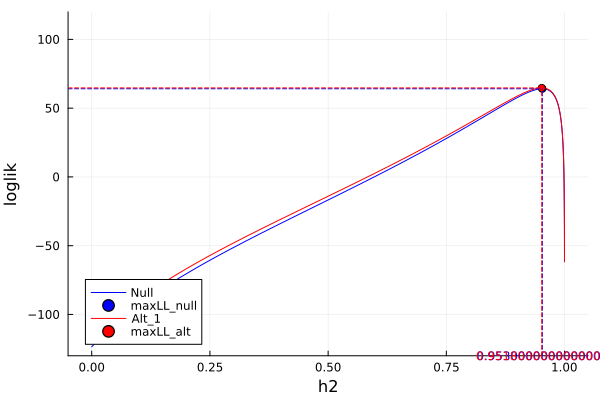

  0.948639 seconds (545.95 k allocations: 701.602 MiB, 28.86% gc time)


In [148]:
@time scan_results_ind = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                              prior_variance = 1.0, prior_sample_size = 0.0,
                              plot_loglik = true, markerID = 1, h2_grid = collect(0.0:9999).*0.0001,
                              x_lims = [0.0, 1.0], y_lims = [-130.0, 120.0]);

In [58]:
(y0, X0, lambda) = transform_rotation(lp_ind_y, geno_ind, kinship_ind_from_strains);

In [59]:
getLL(y0, X0, lambda, 1, 1, 0.99999999)

(ll_null = -316.9905767303809, ll_markerID = -316.9905765912006)

In [60]:
getLL(y0, X0, lambda, 1, 1, 0.95)

(ll_null = 39.78253963884282, ll_markerID = 40.345242416785496)

In [61]:
log(1e65)

149.66803104461297

In [62]:
log(1e-200)

-460.51701859880916

In [63]:
makeweights(0.99, lambda)

248-element Vector{Float64}:
 1.0000000000008433
 1.0000000000001814
 1.0000000000001694
 1.0000000000001688
 1.000000000000071
 1.0000000000000702
 1.000000000000062
 1.0000000000000526
 1.0000000000000429
 1.0000000000000255
 1.0000000000000229
 1.0000000000000224
 1.0000000000000213
 ⋮
 0.0026770889419441145
 0.002549863848062538
 0.002339418261283048
 0.0022388826595827306
 0.002101070990047178
 0.0018706208696819048
 0.0016845884166182162
 0.0014339692152009996
 0.00130667872020644
 0.0011384672063685236
 0.0010530986465861474
 7.725422657996753e-5

In [64]:
BLAS.set_num_threads(Threads.nthreads())

In [65]:
BLAS.get_num_threads()

16

In [66]:
@time scan_results_ind_alt = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                                  assumption = "alt", 
                                  prior_variance = prior[1], prior_sample_size = prior[2]);

  4.434327 seconds (3.18 M allocations: 3.644 GiB, 19.44% gc time, 0.89% compilation time)


In [67]:
@time scan_perms_results_ind = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
                                    prior_variance = prior[1], prior_sample_size = prior[2],
                                    permutation_test = true, nperms = 1000, original = true);

  0.987278 seconds (2.04 M allocations: 266.969 MiB, 1.78% gc time, 87.09% compilation time)


In [68]:
max_lods = vec(mapslices(x -> maximum(x), scan_perms_results_ind; dims = 1));

In [69]:
thrs = map(x -> quantile(max_lods, x), [0.85, 0.95]);

In [70]:
lp_id

21494

In [71]:
mean(scan_perms_results_ind[:, 1] .> 2.94)

0.00040978008468788414

In [72]:
thrs

2-element Vector{Float64}:
 3.1672010332387086
 3.689223945063858

In [73]:
single_results_ind = DataFrame(hcat(scan_results_ind.lod, scan_results_ind_alt.lod, scan_perms_results_ind[:, 1]), ["scan_null", "scan_alt", "scan_perms.original"]);

In [74]:
single_results_ind[1:6, :]

Row,scan_null,scan_alt,scan_perms.original
,Float64,Float64,Float64
1,0.238893,0.241155,0.238893
2,0.238893,0.241155,0.238893
3,0.238893,0.241155,0.238893
4,0.238893,0.241155,0.238893
5,0.238893,0.241155,0.238893
6,0.238893,0.241155,0.238893


#### For liver proteome means by strains

In [118]:
lp_strains_Y = Matrix{Float64}(BXD_pheno_strains_summary_df[:, 3:end]);
lp_strains_y = reshape(lp_strains_Y[:, lp_id], :, 1);

In [119]:
lpst_strains_Y = colStandardize(lp_strains_Y);
lpst_strains_y = reshape(lpst_strains_Y[:, lp_id], :, 1);

In [120]:
@time scan_results_strains = scan(lpst_strains_y, geno_strains, kinship_strains; 
                                  prior_variance = prior[1], prior_sample_size = prior[2],
                                  optim_interval = 4);

  0.047943 seconds (83.15 k allocations: 32.898 MiB)


In [121]:
@time scan_results_strains_alt = scan(lpst_strains_y, geno_strains, kinship_strains;
                                      assumption = "alt",
                                      prior_variance = prior[1], prior_sample_size = prior[2]);

  1.696312 seconds (2.96 M allocations: 904.070 MiB, 32.32% gc time)


In [79]:
@time scan_perms_results_strains = scan(lpst_strains_y, geno_strains, kinship_strains;
                                        permutation_test = true, nperms = 1000, original = true, 
                                        prior_variance = prior[1], prior_sample_size = prior[2]);

  0.068309 seconds (214.61 k allocations: 85.933 MiB, 49.62% compilation time)


In [80]:
single_results_strains = DataFrame(hcat(scan_results_strains.lod, scan_results_strains_alt.lod, scan_perms_results_strains[:, 1]), ["scan_null", "scan_alt", "scan_perms.original"]);

In [81]:
single_results_strains[1:6, :]

Row,scan_null,scan_alt,scan_perms.original
,Float64,Float64,Float64
1,0.130363,0.133461,0.130363
2,0.130363,0.133461,0.130363
3,0.130363,0.133461,0.130363
4,0.130363,0.133461,0.130363
5,0.130363,0.133461,0.130363
6,0.130363,0.133461,0.130363


In [82]:
size(lp_strains_y)

(50, 1)

In [83]:
lpst_strains_y[1:5]./sqrt(0.5)

5-element Vector{Float64}:
 1.0916899085564131
 2.167548082655903
 1.1899750076799473
 1.025715955313699
 1.6095634989552146

In [213]:
U = eigen(kinship_strains).vectors;

In [214]:
D = eigen(kinship_strains).values;

In [215]:
D[1] = 1e-6;
# D[2] = 1e-3;

In [209]:
kinship_Gc = U*diagm(D)*U';

In [210]:
eigen(kinship_Gc).values

50-element Vector{Float64}:
  9.99999999588045e-7
  0.0009999999999998675
  0.14277478768761515
  0.16675614955767482
  0.17409301931349636
  0.1890066339308834
  0.19035903878783342
  0.19794496034236592
  0.20841714554652083
  0.21426887743130157
  0.22749970801263422
  0.23982876083373814
  0.2485734554493378
  ⋮
  0.6887752589601354
  0.7149085151990804
  0.8067309198476476
  0.8508876040634751
  0.8554807863248592
  0.9211609501121718
  0.9492880600073249
  1.069737021498105
  1.182495884210649
  1.2110202072132106
  1.46984334332127
 26.22589737473227

Loglik plot: 


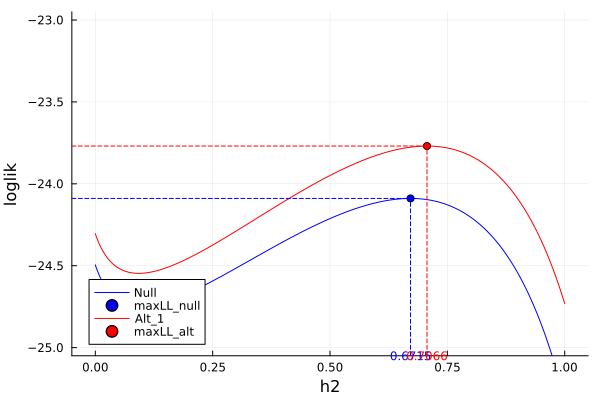

  0.261882 seconds (546.00 k allocations: 175.046 MiB)


In [211]:
@time scan_results_strains = scan(lpst_strains_y, geno_strains, kinship_strains;
                              prior_variance = 1.0, prior_sample_size = 0.0,
                              plot_loglik = true, markerID = 1, h2_grid = collect(0.0:9999).*0.0001,
                              x_lims = [0.0, 1.0], y_lims = [-25.0, -23.0]);

Loglik plot: 


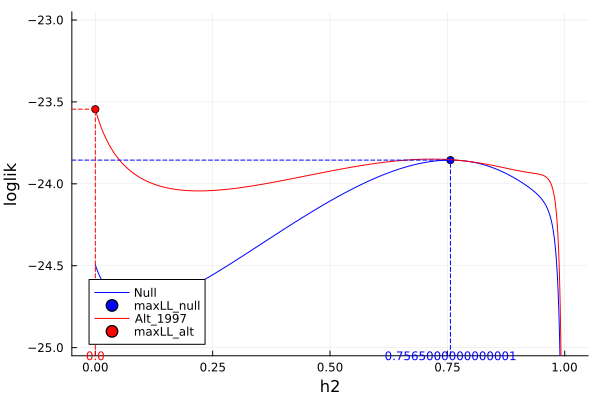

  0.271042 seconds (545.88 k allocations: 175.057 MiB)


In [212]:
@time scan_results_strains_Gc = scan(lpst_strains_y, geno_strains, kinship_Gc;
                              prior_variance = 1.0, prior_sample_size = 0.0,
                              plot_loglik = true, markerID = 1997, h2_grid = collect(0.0:9999).*0.0001,
                              x_lims = [0.0, 1.0], y_lims = [-25.0, -23.0]);

### Weighted Error Variances:

Assuming that

$$y = X_0 B_0+g\beta+\epsilon$$

where 

$$\epsilon \sim N(0,  \sigma^2_g K + \sigma^2_e V) $$ and 

the matrix $V$ is a diagonal but not necessarily an identity matrix.

Notice that since $V^{-1} = V^{-1/2}V^{-1/2}$, then the strategy is as such:

Let $$y^* = V^{-1/2}y = V^{-1/2}X0+V^{-1/2}g\beta+V^{-1/2}\epsilon$$

then 
$$V^{-1/2}\epsilon \sim N(0, \sigma^2_g V^{-1/2}KV^{-1/2}+\sigma^2_e V^{-1/2}VV^{-1/2} = \sigma^2_g K^*+\sigma^2_e I)$$

In [ ]:
lp_id = 29437

In [ ]:
lp_id = 241

In [ ]:
lpst_strains_y = reshape(lpst_strains_Y[:, lp_id], :, 1);

In [ ]:
lpst_ind_y = reshape(lpst_ind_Y[:, lp_id], :, 1);

In [ ]:
prior = [1.0, 0.0]

In [ ]:
grid_list = collect(0:999).*0.001;

In [ ]:
eigen(kinship_ind_from_strains).values

In [ ]:
test_a = scan(lpst_ind_y, geno_ind, kinship_ind_from_strains;
              # weights = weights_true,
              prior_variance = 1.0, prior_sample_size = 0.0, 
              optim_interval = 10, plot_loglik = true, markerID = 7321, h2_grid = grid_list, y_lims = [-200.0, 100.0])

In [ ]:
test_a = scan(lpst_strains_y, geno_strains, kinship_strains;
              weights = weights_true,
              prior_variance = 1.0, prior_sample_size = 0.0, 
              optim_interval = 10, plot_loglik = true, markerID = 2, h2_grid = grid_list, y_lims = [-60.0, -55.0])

In [ ]:
test_a.h2_null

In [ ]:
@time test_A = bulkscan_null_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_list;
                                  weights = weights_true, 
                                  prior_variance = 1.0, prior_sample_size = 0.1);

In [ ]:
test_A.h2_null_list[lp_id]

In [ ]:
test_A_exact.h2_null_list[lp_id]

In [ ]:
findall(test_A.h2_null_list .>= 0.5)

In [ ]:
maximum(abs.(test_a.lod .- lod_by_hand.lod))

In [ ]:
scan_results_strains.h2_null

In [ ]:
@time test_A_exact = bulkscan_null(lpst_strains_Y, geno_strains, kinship_strains; nb = Threads.nthreads(),
                                   weights = weights_true, 
                                   prior_variance = 1.0, prior_sample_size = 0.1, optim_interval = 10);

In [ ]:
test_A_exact.h2_null_list[lp_id]

In [ ]:
findall(test_A_exact.h2_null_list .>= 0.9)

In [ ]:
test_A.h2_null_list[lp_id]

In [ ]:
hcat(test_A_exact.L[:, lp_id], test_a.lod, test_A.L[:, lp_id])

In [ ]:
sum(abs.(test_A_exact.L[:, lp_id] .- test_a.lod))

In [ ]:
maximum(abs.(test_A.L[:, lp_id] .- test_a.lod))

### Multiple-trait genome scans:

In [84]:
BLAS.set_num_threads(Threads.nthreads())

In [85]:
BLAS.get_num_threads()

16

In [86]:
grid_list = collect(0.0:0.01:0.99);

In [87]:
grid_list = collect(0.0:0.05:0.95);

#### For individual liver proteome

In [88]:
size(lpst_ind_Y)

(248, 32445)

In [89]:
size(lpst_strains_Y)

(50, 32445)

In [90]:
Threads.nthreads()

16

In [99]:
@time bulkscan_results_ind_null = bulkscan_null(lp_ind_Y, geno_ind, kinship_ind_from_strains; nb = Threads.nthreads(),
                                                prior_variance = 1.0, prior_sample_size = 0.0, optim_interval = 1);

142.498346 seconds (2.60 G allocations: 1.813 TiB, 17.24% gc time)


In [100]:
findall(bulkscan_results_ind_null.h2_null_list .> 0.95)

2-element Vector{Int64}:
 21494
 21498

In [93]:
BLAS.set_num_threads(Threads.nthreads())

In [94]:
@time bulkscan_results_ind_alt_grid = bulkscan_alt_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_list);

 22.895054 seconds (8.86 M allocations: 41.849 GiB, 6.49% gc time, 0.19% compilation time)


In [95]:
@time bulkscan_results_ind_null_grid = bulkscan_null_grid(lpst_ind_Y, geno_ind, kinship_ind_from_strains, grid_list);

  7.916723 seconds (12.97 M allocations: 11.758 GiB, 3.06% gc time, 19.86% compilation time)


#### For liver proteome means by strains

In [ ]:
@time bulkscan_results_strains_null = bulkscan_null(lpst_strains_Y, geno_strains, kinship_strains; nb = Threads.nthreads(),
                                                    prior_variance = 1.0, prior_sample_size = 0.1, optim_interval = 1);

In [ ]:
BLAS.set_num_threads(Threads.nthreads())

In [ ]:
@time bulkscan_results_strains_alt_grid = bulkscan_alt_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_list);

In [ ]:
@time bulkscan_results_strains_null_grid = bulkscan_null_grid(lpst_strains_Y, geno_strains, kinship_strains, grid_list;
                                                              prior_variance = 1.0, prior_sample_size = 0.1);

In [ ]:
pwd()

In [ ]:
bulkscan_results_strains_null_grid.L

#### Multiple_traits:

In [ ]:
b_ind_null = vcat(bulkscan_results_ind_null.h2_null_list', bulkscan_results_ind_null.L);

In [ ]:
b_ind_null_grid = vcat(bulkscan_results_ind_null_grid.h2_null_list', bulkscan_results_ind_null_grid.L);

In [ ]:
b_strains_null = vcat(bulkscan_results_strains_null.h2_null_list', bulkscan_results_strains_null.L);

In [ ]:
b_strains_null_grid = vcat(bulkscan_results_strains_null_grid.h2_null_list', bulkscan_results_strains_null_grid.L);

In [ ]:
b_strains_null_grid = vcat(bulkscan_results_strains_null_grid.h2_null_list', bulkscan_results_strains_null_grid.L);

## Examine hsqs, maxLods:

In [ ]:
L_ind_null = bulkscan_results_ind_null.L;

In [ ]:
L_ind_null_grid = bulkscan_results_ind_null_grid.L;

In [ ]:
function getMaxLODs(L::Array{Float64, 2})
    
    m = size(L, 2);
    max_marker = Array{Int64, 1}(undef, m);
    max_lod = Array{Float64, 1}(undef, m);
    
    for i in 1:m
        result_i = findmax(L[:, i]); 
        max_marker[i] = result_i[2];
        max_lod[i] = result_i[1];
    end
    
    return (max_markers = max_marker, max_lod = max_lod);
end

In [ ]:
@time begin
    max_results_ind = getMaxLODs(L_ind_null);
    max_results_ind_grid = getMaxLODs(L_ind_null_grid);
end;

In [ ]:
pwd()

In [ ]:
# CSV.write("output/max_results_ind.csv", DataFrame(round.(hcat(max_results_ind.max_markers, max_results_ind.max_lod), digits = 2), ["max_marker", "max_lod"]))

In [ ]:
# CSV.write("output/max_results_ind_grid.csv", DataFrame(round.(hcat(max_results_ind_grid.max_markers, max_results_ind_grid.max_lod), digits = 2), ["max_marker", "max_lod"]))

In [ ]:
@time bulkscan_results_ind_null_4 = bulkscan_null(lpst_ind_Y, geno_ind, kinship_ind_from_strains; nb = Threads.nthreads(),
                                                  prior_variance = 1.0, prior_sample_size = 0.1, optim_interval = 4);

In [ ]:
@time bulkscan_results_null_strains_4 = bulkscan_null(lpst_strains_Y, geno_strains, kinship_strains; nb = Threads.nthreads(),
                                                      prior_variance = 1.0, prior_sample_size = 0.1, optim_interval = 4);

In [ ]:
L_ind = bulkscan_results_ind_null.L;
L_strains = bulkscan_results_strains_null.L;
h2s_ind = bulkscan_results_ind_null.h2_null_list;
h2s_strains = bulkscan_results_strains_null.h2_null_list;

In [ ]:
L_ind_4 = bulkscan_results_ind_null_4.L;
L_strains_4 = bulkscan_results_null_strains_4.L;
h2s_ind_4 = bulkscan_results_ind_null_4.h2_null_list;
h2s_strains_4 = bulkscan_results_null_strains_4.h2_null_list;

## Get Plot:

In [ ]:
BXD_pmap = CSV.read("data/BXD_pmap.csv", DataFrame);
BXD_gmap = CSV.read("data/BXD_gmap.csv", DataFrame);

In [ ]:
max_results_df_ind = CSV.read("output/max_results_ind.csv", DataFrame);

In [ ]:
max_results_df_ind_grid = CSV.read("output/max_results_ind_grid.csv", DataFrame);

In [ ]:
using RecipesBase, Plots, Plots.PlotMeasures, ColorSchemes

In [ ]:
function plot_eQTL2(lodc::Array{Float64, 2}, gmap::DataFrame, phenocovar::DataFrame;
                thr::Float64 = 5.0, kwargs...)
    
    x, y, z, mysteps, mychr = get_eQTL_accMb(
                                lodc, 
                                phenocovar,
                                gmap;
                                thr = thr,
                                kwargs...
                              )

    eQTLplot(x, y, z, mysteps, mychr, kwargs...)

end

In [ ]:
BXD_pmap.Chr = convert.(String, BXD_pmap.Chr);

In [ ]:
BXD_gmap.Chr = convert.(String, BXD_gmap.Chr);

In [ ]:
plot_eQTL2(Matrix(max_results_df_ind), BXD_gmap, BXD_pmap)

In [ ]:
lp_id

In [ ]:
lp_ind_y

In [ ]:
lpst_ind_y

In [ ]:
scan_results_ind_alt.lod

### Heritabilities:

### Maximum lod scores:

In [ ]:
histogram(max_results_ind.max_lod, label = "Maximum lod - Individual LP")

## Run GEMMA for single-trait scans:

In [ ]:
pwd()

In [ ]:
gemma = "/home/zyu20/Softwares/gemma-0.98.5-linux-static-AMD64"

In [ ]:
run(`$gemma -h`)

In [ ]:
function transform_bxd_pheno_to_gemma2(inputfile::AbstractString, outputfile::AbstractString, iter::Int64)
    pheno = CSV.read(inputfile, DataFrame);
    pheno = Matrix{Float64}(pheno[:, 3:end]);
    open(outputfile, "w") do io
        writedlm(io, pheno[:, iter])
    end
    return pheno
end

In [ ]:
function transform_bxd_geno_to_gemma2(inputfile::AbstractString, outputfile::AbstractString, 
                                      startCol::Int64)
    data = CSV.read(inputfile, DataFrame);
    
    marker_names = names(data)[startCol:end];
    data = 2 .* data[:, startCol:end] |> x -> Matrix{Float64}(x)
    # data = data[:, startCol:end] |> x -> Matrix{Float64}(x)
    minor_allele = fill("A", length(marker_names), 1);
    major_allele = fill("B", length(marker_names), 1);
    output = hcat(hcat(marker_names, minor_allele, major_allele), transpose(data))
    writeToFile(output, outputfile)
    return output
end

In [ ]:
lp_id

In [ ]:
# transform_bxd_geno_to_gemma2("data/GN886_geno_strains_summary.csv", "data/GEMMA_data/GN886_geno_strains_summary.txt", 2);
# transform_bxd_geno_to_gemma2("data/GN886_geno_summary.csv", "data/GEMMA_data/GN886_geno_ind_summary.txt", 4);

In [ ]:
lp_id = 29437;

In [ ]:
transform_bxd_pheno_to_gemma2("data/GN886_pheno_strain_means_summary.csv", "data/GEMMA_data/GN886_pheno_strains_summary.txt", lp_id);
transform_bxd_pheno_to_gemma2("data/GN886_pheno_summary.csv", "data/GEMMA_data/GN886_pheno_ind_summary.txt", lp_id);

In [ ]:
# writedlm("data/GEMMA_data/kinship_strains.txt", kinship_strains, '\t')
# writedlm("data/GEMMA_data/kinship_ind.txt", kinship_ind_from_strains, '\t')

In [ ]:
function p2lod(pval::Float64, df::Int64)
    
    lrs = invlogcdf(Chisq(df), log(1-pval))
    lod = lrs/(2*log(10))
    
    # return lrs
    return lod

end

In [ ]:
function gemmaWrapper(pheno_filename::String, geno_filename::String,
                      kinship_filename::String, output_filename::String)
    
    run(`$gemma -g $geno_filename -p $pheno_filename -k $kinship_filename -lmm 2 -lmax 1000000 -o $output_filename`)
    
end

In [ ]:
@time gemmaWrapper("data/GEMMA_data/GN886_pheno_strains_summary.txt", 
                   "data/GEMMA_data/GN886_geno_strains_summary.txt",
                   "data/GEMMA_data/kinship_strains.txt",
                   "results_strains.txt");

In [ ]:
@time gemmaWrapper("data/GEMMA_data/GN886_pheno_ind_summary.txt", 
                   "data/GEMMA_data/GN886_geno_ind_summary.txt",
                   "data/GEMMA_data/kinship_ind.txt",
                   "results_ind.txt");

In [ ]:
sum(eigen(kinship_ind_from_strains).values.<0.0001)

In [ ]:
gemma_results_strains = readdlm("output/results_strains.txt.assoc.txt", '\t');
gemma_results_ind = readdlm("output/results_ind.txt.assoc.txt", '\t');

In [ ]:
gemma_strains = gemma_results_strains[2:end, 10] |> x -> Array{Float64}(x);
gemma_ind = gemma_results_ind[2:end, 10] |> x -> Array{Float64}(x);

In [ ]:
gemma_strains_lod = p2lod.(gemma_strains, 1);
gemma_ind_lod = p2lod.(gemma_ind, 1);

In [ ]:
hcat(gemma_ind_lod, scan_results_ind.lod, bulkscan_results_null_grid_ind.L[:, lp_id])

In [ ]:
hcat(gemma_strains_lod, scan_results_strains.lod, bulkscan_results_null_strains.L[:, lp_id])

In [ ]:
lookRange = 1:7321

In [ ]:
plot(gemma_strains_lod[lookRange], label = "GEMMA_strains");
# plot!(scan_results_strains_alt_hub.lod[lookRange], label = "BulkLMM_strains")
plot!(bulkscan_results_null_strains.L[lookRange, lp_id], label = "BulkLMM_strains")

In [ ]:
scan_results_ind.h2_null